# TCSS 478/588 In-class Exercise: Linear regression

These exercises will be used to illustrate how to perform data analyses using R.
Alternatively, you can use R or Rstudio. 
I assume you will learn basic R commands on your own.

Credit: The data and ideas behind these exercises and homeworks are from the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.
http://www.maayanlab.net/crowdsourcing/megatask1.php

The overarching goal is to predict adverse drug reactions. But we will take this task step by step. You will learn more about the meanings of these data in future lectures. For illustrative purposes in today’s class, just treat these data as numbers in a matrix.

## 1. Download and read in data (same as last week)
Download the data “gene_expression_n438x978.txt” from canvas to your computer.  I have removed the first character (#) and an ‘ from the input file to make R happy.

In [1]:
getwd()

[1] "/home/jovyan"

In [2]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
my.data[1:5, 1:6]

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773,-0.007325439
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396,0.070951154
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781,0.025003360
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348,0.024005885
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959,-0.001752450


In [3]:
dim (my.data)

[1] 438 978

### recap of last week's lab in which computed correlation
### we saw that the max pairwise corrlation between genes is 0.5227 and the minimum is -0.7655


In [4]:
cor(my.data$UBE2C, my.data$CDK1)

[1] 0.5227213

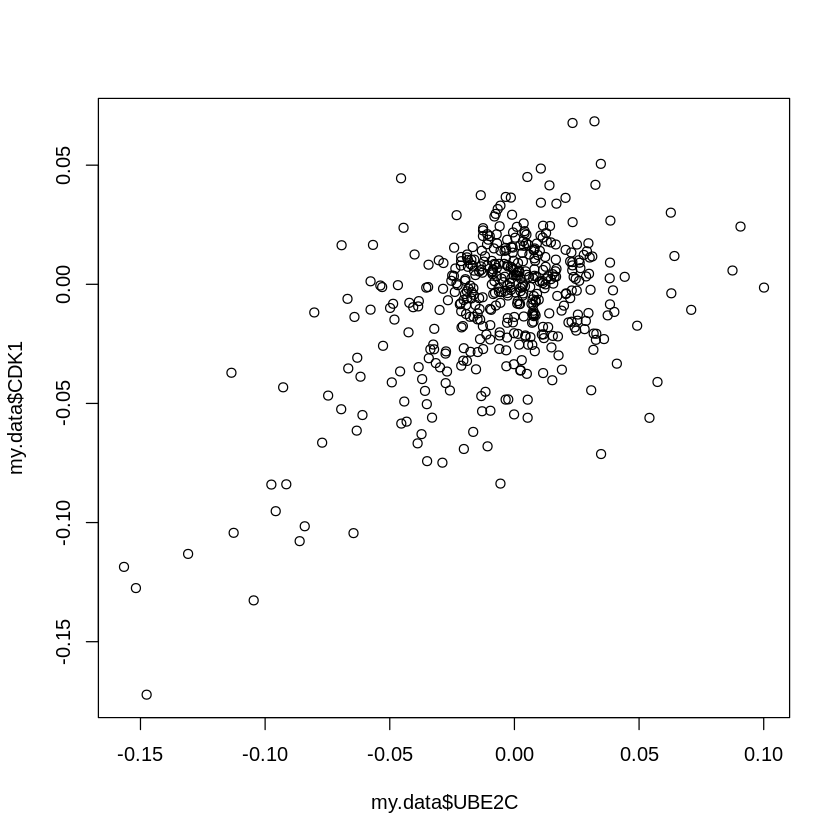

In [5]:
plot(my.data$UBE2C, my.data$CDK1)

## in this lab we will use linear regression to build a simple linear regression to model the relationship between CDK1 and UBE2C

## 2. Linear Regression.

In [6]:
# compute the index of UBE2C and CDK1
which (dimnames(my.data)[[2]] == "UBE2C")
which (dimnames(my.data)[[2]] == "CDK1")

[1] 276

[1] 408

## fit a linear regression model using CDK1 as our response and UBE2C as our predictor variable

In [11]:
# fit a linear regression model for CDK1 and UBE2C
lmFit1 <- lm (my.data$CDK1 ~ my.data$UBE2C)

In [12]:
summary(lmFit1) #n=438, the length of our vectors. , b0= -0.005261 and b1=0.4809, RSE = 0.02491, degree of freedom = n-2, so 436. , Rsquared= 0.2732


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096025 -0.014247  0.003149  0.017000  0.071622 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005261   0.001214  -4.336 1.81e-05 ***
my.data$UBE2C  0.480930   0.037563  12.803  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02491 on 436 degrees of freedom
Multiple R-squared:  0.2732,	Adjusted R-squared:  0.2716 
F-statistic: 163.9 on 1 and 436 DF,  p-value: < 2.2e-16


In [13]:
# recall that correlation is equal to the sqer (R-square)
sqrt(0.2732)

[1] 0.5226854

In [14]:
names(lmFit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [17]:
coef(lmFit1)
coef(lmFit1)[[1]]
coef(lmFit1)[[2]] #collapses the vector to a single entry

(Intercept) my.data$UBE2C 
 -0.005261415   0.480930215

[1] -0.005261415

[1] 0.4809302

In [19]:
predict.lmFit1 <- predict (lmFit1)
predict.lmFit1 [1:10] 

1            2            3            4            5            6 
-0.007773099 -0.015116427 -0.017267706  0.010367674 -0.011705924 -0.001266865 
           7            8            9           10 
-0.014367461 -0.006542832 -0.006853536 -0.013056848

## the "predict" function gives you the fitted values given the estimated regression coefficients

In [25]:
my.predict <- coef(lmFit1)[[1]] + coef(lmFit1)[[2]] * (my.data$UBE2C) # y_i(hat)=beta_0(hat) *x_i

In [26]:
my.predict[1:10] # same as "predict function", 

[1] -0.007773099 -0.015116427 -0.017267706  0.010367674 -0.011705924
 [6] -0.001266865 -0.014367461 -0.006542832 -0.006853536 -0.013056848

In [29]:
curr.RSE = 0.02491
curr.RSS = (curr.RSE)^2 *436
curr.RSS

[1] 0.2705415

In [33]:
# want to compute R-squared
#TSS = sum (y_i - mean (y_i))^2
curr.TSS <- sum((my.data$CDK1 - mean (my.data$CDK1))^2)
curr.TSS
my.Rsq <- 1 - curr.RSS/curr.TSS
my.Rsq

[1] 0.3722301

[1] 0.2731875

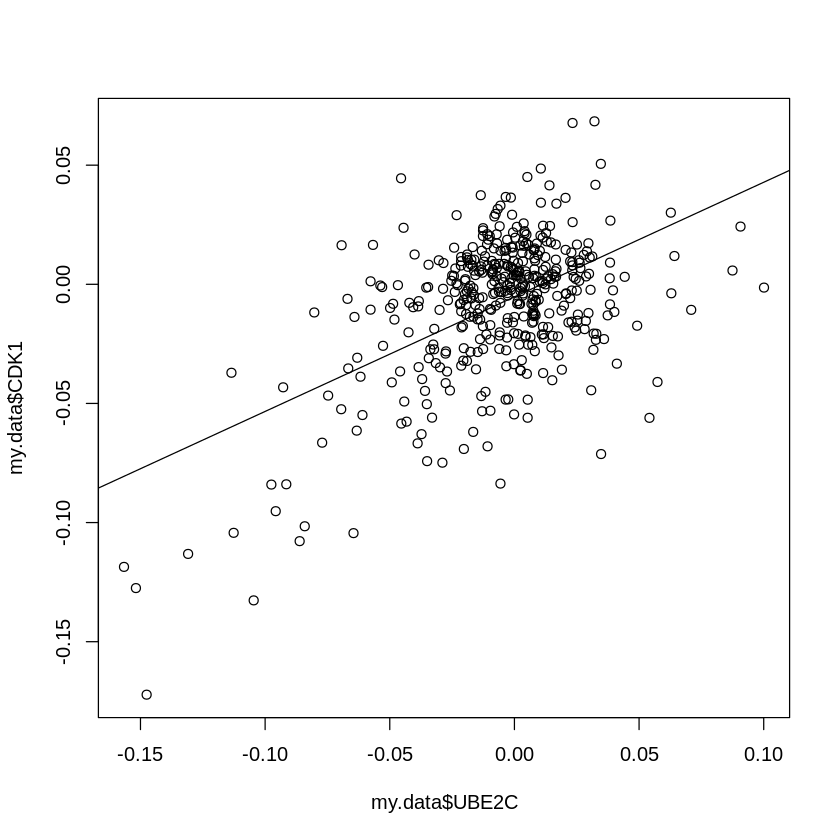

In [34]:
plot(my.data$UBE2C, my.data$CDK1)
abline(lmFit1)

# Multiple linear regression

In [37]:
# use 3 variables: UBE2C, ATF1, RHOA
lmFit2 <- lm(my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)
summary(lmFit2)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095512 -0.014494  0.003057  0.016405  0.067388 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005638   0.001208  -4.666 4.10e-06 ***
my.data$UBE2C  0.465947   0.037439  12.446  < 2e-16 ***
my.data$ATF1   0.187601   0.045325   4.139 4.19e-05 ***
my.data$RHOA   0.004271   0.051644   0.083    0.934    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02449 on 434 degrees of freedom
Multiple R-squared:  0.3008,	Adjusted R-squared:  0.296 
F-statistic: 62.25 on 3 and 434 DF,  p-value: < 2.2e-16


#### Degrees of freedom is now 434 because we are estimated 4 parameters (beta_0,beta_1,beta_2,beta_3)

### Your task: pick a 4th gene. Add this 4th gene to the lmFit2 model. Does this additional variable improve the model?

In [38]:
# use 4 variables: UBE2C, ATF1, RHOA, FOXO3
lmFit3 <- lm(my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA +my.data$FOXO3)
summary(lmFit3)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA + 
    my.data$FOXO3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.097963 -0.013439  0.002599  0.016705  0.060857 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.004228   0.001221  -3.464 0.000585 ***
my.data$UBE2C  0.469251   0.036607  12.818  < 2e-16 ***
my.data$ATF1   0.163444   0.044621   3.663 0.000280 ***
my.data$RHOA   0.024575   0.050681   0.485 0.627989    
my.data$FOXO3 -0.209155   0.045524  -4.594  5.7e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02394 on 433 degrees of freedom
Multiple R-squared:  0.3333,	Adjusted R-squared:  0.3272 
F-statistic: 54.13 on 4 and 433 DF,  p-value: < 2.2e-16


In [43]:
# use all variables?
# not working
#lmFit4 <- lm(my.data$CDK1 ~ my.data)
#summary(lmFit4)